           x1         x2  result
0   34.623660  78.024693       0
1   30.286711  43.894998       0
2   35.847409  72.902198       0
3   60.182599  86.308552       1
4   79.032736  75.344376       1
..        ...        ...     ...
95  83.489163  48.380286       1
96  42.261701  87.103851       1
97  99.315009  68.775409       1
98  55.340018  64.931938       1
99  74.775893  89.529813       1

[100 rows x 3 columns]


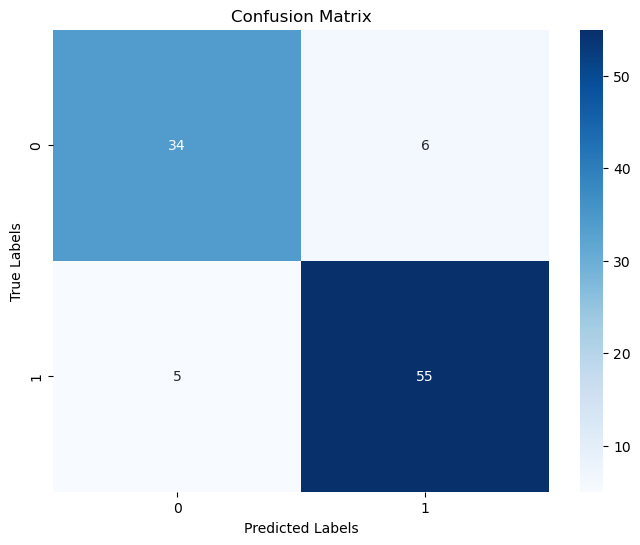

Accuracy: 0.9


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


col_names=['x1','x2','result']
ds=pd.read_csv('Student-University(For Logistic Regression Program).csv',names=col_names)
print(ds)
x = ds.iloc[:,[0,1]].values
y = ds.iloc[:,2].values
xp=preprocessing.scale(x)
kf=KFold(n_splits=5)
# Initialize an empty list to store all predictions and ground truth labels
all_predictions = []
all_ground_truth = []

for train_index, test_index in kf.split(xp):
    xtrain, xtest = xp[train_index], xp[test_index]
    ytrain, ytest = y[train_index], y[test_index]

    b0 = 0.0
    b1 = 0.0
    b2 = 0.0
    epoch = 10000
    alpha = 0.001

    while epoch > 0:
        for i in range(len(xtrain)):
            prediction = 1 / (1 + np.exp(-(b0 + b1 * xtrain[i, 0] + b2 * xtrain[i, 1])))
            b0 = b0 + alpha * (ytrain[i] - prediction) * prediction * (1 - prediction) * 1.0
            b1 = b1 + alpha * (ytrain[i] - prediction) * prediction * (1 - prediction) * xtrain[i, 0]
            b2 = b2 + alpha * (ytrain[i] - prediction) * prediction * (1 - prediction) * xtrain[i, 1]
        epoch -= 1

    # Make predictions for the test set
    final_prediction = [1 if 1 / (1 + np.exp(-(b0 + b1 * x[0] + b2 * x[1]))) > 0.5 else 0 for x in xtest]

    # Append predictions and ground truth labels to the lists
    all_predictions.extend(final_prediction)
    all_ground_truth.extend(ytest)

# After the loop, compute the confusion matrix
cm = confusion_matrix(all_ground_truth, all_predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

from sklearn.metrics import accuracy_score
print("Accuracy:", accuracy_score(ytest, final_prediction))